# Práctica de Lógica Difusa

`Asigantura: Sistemas Inteligentes II`

`Autor: José María Amusquívar Poppe`

## Introducción

El objetivo de esta práctica es la de ampliar los conocimientos respecto a la teoría de *Lógica Difusa*. Ésta es capaz de proporcionar un marco matemático que permite, a un computador, modelar la incertidumbre de los procesos cognitivos humanos. Una breve explicación gráfica de su funcionamiento sería la de la figura 1.

<figure style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/0c/SistemaDifuso.JPG" alt="Representación gráfica" title="Representación gráfica" style="margin-top: 20px;"/>
    <figcaption style="margin-bottom: 20px">Figura 1: Representación gráfica de un sistema de control</figcaption>
</figure>

En la figura anterior se puede observar que existe una entrada, la cual se conecta con el motor de inferencias, donde se encuentran las reglas definidas del sistema y, finalmente, se obtiene una salida cuyo resultado debe coincidir con el esperado.


## Problema

El problema elegido para esta práctica es la de un servicio automatizado de bajas médicas, la cual, a partir de dos entradas proporcionadas, ésta generará los días de baja médica que debe permanecer el paciente. Las dos entradas del sistema se corresponde con el nivel de dolor del paciente y los días que lleva sintiendo dicho dolor.

#### Servicio automatizado de bajas

**Antecedentes (Entradas)**

* **Dolor del paciente:** Universo: En una escala de 1 al 10, ¿cuánto dolor siente?. Conjunto difuso: bajo, medio, alto.

* **Días con dolor:** Universo: En una escala de 0 a 15 días, ¿cuántos días lleva sintiendo el dolor? Conjunto difuso: pocos, varios, muchos.

**Consecuentes (Salidas)**
* **Días de baja:** Universo: En una escala de 0 a 31 días, ¿cuántos días de baja médica debe tener el paciente? Fuzzy set: pocos, varios, muchos.

**Reglas**
* Si el paciente tiene un dolor alto o lleva sintiéndolo muchos días, entonces los días de baja otorgados serán muchos.
* Si el paciente tiene un dolor medio y lleva sintiéndolo varios días, entonces los días de baja otorgados serán varios.
* Si el paciente tiene un dolor bajo o lleva sintinéndolo pocos días, entonces los días de baja otorgados serán pocos.
* Si el paciente tiene un dolor alto y lleva sintiéndolor pocos días, entonces los días de baja otorgados serán varios.
* Si el paciente tiene un dolor bajo y lleva sintiéndolor muchos días, entonces los días de baja otorgados serán varios.

**Uso**

Por tanto, si un paciente se presenta en el médico con un dolor alto, el cual lleva sintiéndolo muchos días, recibirá el máximo de días de baja, es decir, 31 días (1 mes).

## Ejecución del programa

Para realizar esta práctica se ha empleado las librerías *scikit-fuzzy* para montar la estructura del sistema de inferencias, *numpy* para el cálculo numérico y el uso de vectores, y *matplotlib* para presentar las gráficas resultantes del programa.

**INSTALACIÓN/IMPORTACIÓN DE LIBRERÍAS**

In [1]:
!pip install scikit-fuzzy
!pip install numpy
!pip install matplotlib

import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

**DESARROLLO DEL CÓDIGO**

Lo primero que se realiza en el programa es declarar las entradas y la salida, además de otorgarles un nombre.

In [2]:
dolores = ctrl.Antecedent(np.arange(1, 11, 1), 'dolores')
dias = ctrl.Antecedent(np.arange(0, 16, 1), 'dias')
baja = ctrl.Consequent(np.arange(0, 32, 1), 'baja')

Y posteriormente se genera el universo para cada una de ellas. Aplicando la función *automf()* se automatiza este proceso, mientras que si se desea realizar a mano, se puede emplear la función *trimf()*.

In [3]:
dolores.automf(3)
dias.automf(3)

baja['pocos'] = fuzz.trimf(baja.universe, [0, 0, 15])
baja['varios'] = fuzz.trimf(baja.universe, [0, 15, 31])
baja['muchos'] = fuzz.trimf(baja.universe, [15, 31, 31])

Lo siguiente a realizar es desarrollar las reglas declaradas anteriormente, empleando operadores lógicos *AND* y *OR*, y asignándole un comportamiento de salida.

In [4]:
rule1 = ctrl.Rule(dolores['good'] | dias['good'], baja['muchos'])
rule2 = ctrl.Rule(dolores['average'] & dias['average'], baja['varios'])
rule3 = ctrl.Rule(dolores['poor'] | dias['poor'], baja['pocos'])
rule4 = ctrl.Rule(dolores['good'] & dias['average'], baja['varios'])
rule5 = ctrl.Rule(dolores['average'] & dias['good'], baja['varios'])
rule6 = ctrl.Rule(dolores['poor'] & dias['good'], baja['pocos'])
rule7 = ctrl.Rule(dolores['good'] & dias['poor'], baja['varios'])

Y, finalmente, se añaden las reglas generadas al sistema de inferencias, consiguiendo de este modo representar las reglas en un lenguaje comprensible para el computador.

In [5]:
baja_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
dias_baja = ctrl.ControlSystemSimulation(baja_ctrl)

Una vez construido el sistema, se puede proceder a probar su funcionamiento, además de visualizar las gráficas resultantes.

**DATOS DE ENTRADA**

In [6]:
dias_baja.input['dolores'] = 5       # Rango de 1 a 10
dias_baja.input['dias'] = 7          # Rango de 0 a 31

dias_baja.compute()                  # Se procesan las entradas

Como resultado final se obtiene el número de días de baja otorgados al paciente (salida), y la correspodiente gráfica resultado.

Número de días de baja:  15.241587954431468


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


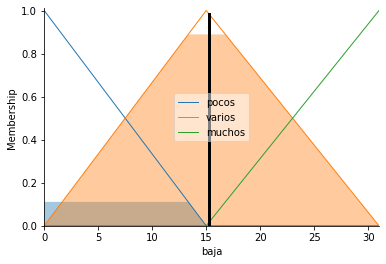

In [7]:
print("Número de días de baja: ", dias_baja.output['baja'])     
baja.view(sim=dias_baja)

Tal como se puede apreciar en la gráfica anterior, el número de días de baja otorgado al paciente es de 15 días. Esto es algo lógico pues los datos de entrada se corresponden con los puntos medios de la escala *dolores* y del *número de días con dolor*.